### 뚝섬 한강 공원 주차장 분석

- 뚝섬 한강 공원의 주차장 혼잡도(여유, 보통, 혼잡, 만차)를 시간별로 예측
- 데이터 전처리, feature, taregt 선별 

In [7]:
# 세팅
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # nan 값 확인용
from seaborn import objects as so
import holidays

In [8]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


------
## 데이터 보기

In [214]:
# 기본 데이터 불러오기
df=pd.read_csv('../../Data/한강공원 주차장 일별 이용 현황.csv', encoding='euc-kr')
df.head()


,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
1,PLT-011,잠실1주차장,1059,66361,2024/11/10
2,PLT-001,강서1주차장,329,26875,2024/11/10
3,PLT-008,여의도5주차장,229,22509,2024/11/10
4,PLT-008,여의도2주차장,1934,150135,2024/11/10


In [215]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지구별     45277 non-null  object
 1   주차장명    45277 non-null  object
 2   주차대수    45277 non-null  int64 
 3   이용시간    45277 non-null  int64 
 4   날짜      45277 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


> 주차장 일별 데이터 결측치 X

### 전체 데이터에서 뚝섬한강공원 데이터만 추출

In [216]:
df_dd = df[df['지구별'] == 'PLT-005']
df_dd.head()

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
10,PLT-005,뚝섬3주차장,686,62848,2024/11/10
16,PLT-005,뚝섬4주차장,864,79419,2024/11/10
21,PLT-005,뚝섬2주차장,965,108345,2024/11/10
30,PLT-005,뚝섬2주차장,850,91910,2024/11/09


In [217]:
# index 정리
df_dd.reset_index(drop=True, inplace=True)
df_dd.head()

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
1,PLT-005,뚝섬3주차장,686,62848,2024/11/10
2,PLT-005,뚝섬4주차장,864,79419,2024/11/10
3,PLT-005,뚝섬2주차장,965,108345,2024/11/10
4,PLT-005,뚝섬2주차장,850,91910,2024/11/09


In [218]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지구별     6956 non-null   object
 1   주차장명    6956 non-null   object
 2   주차대수    6956 non-null   int64 
 3   이용시간    6956 non-null   int64 
 4   날짜      6956 non-null   object
dtypes: int64(2), object(3)
memory usage: 271.8+ KB


In [219]:
# 주차장 갯수 확인
# 1부터 4까지의 주차장 보유
df_dd['주차장명'].unique()

array(['뚝섬1주차장', '뚝섬3주차장', '뚝섬4주차장', '뚝섬2주차장'], dtype=object)

In [220]:
# 이용시간 0값 확인
df_dd.describe()

,주차대수,이용시간
count,6956.000000,6956.000000
mean,526.861415,52692.554198
std,350.742185,41924.445747
min,1.000000,0.000000
25%,250.000000,19991.000000
50%,460.000000,44253.000000
75%,702.000000,71251.750000
max,2999.000000,291616.000000


In [221]:

df_dd[df_dd['이용시간'] == 0].sort_values('주차장명')

,지구별,주차장명,주차대수,이용시간,날짜
4002,PLT-005,뚝섬1주차장,135,0,2022/02/06
6167,PLT-005,뚝섬1주차장,2,0,2020/08/12
6169,PLT-005,뚝섬1주차장,2,0,2020/08/11
4004,PLT-005,뚝섬2주차장,346,0,2022/02/06
4001,PLT-005,뚝섬3주차장,188,0,2022/02/06
6165,PLT-005,뚝섬3주차장,6,0,2020/08/12
6168,PLT-005,뚝섬3주차장,4,0,2020/08/11
6180,PLT-005,뚝섬3주차장,2,0,2020/08/07
4003,PLT-005,뚝섬4주차장,292,0,2022/02/06
6181,PLT-005,뚝섬4주차장,1,0,2020/08/06


> 주차대수는 있지만 이용시간이 0으로 작성된 것을 확인

#### 0값을 월 & (요일) & 주차장명 & 년도 별 1대당 평균 이용시간으로 대치

In [222]:
# 날짜를 datetime 으로 변경
df_dd['날짜']=pd.to_datetime(df_dd['날짜'])

In [223]:
# 날짜를 년도, 월, 일로 구분
df_dd['년도'] = df_dd['날짜'].dt.year
df_dd['월'] = df_dd['날짜'].dt.month
df_dd['일'] = df_dd['날짜'].dt.day

In [224]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     6956 non-null   object        
 1   주차장명    6956 non-null   object        
 2   주차대수    6956 non-null   int64         
 3   이용시간    6956 non-null   int64         
 4   날짜      6956 non-null   datetime64[ns]
 5   년도      6956 non-null   int32         
 6   월       6956 non-null   int32         
 7   일       6956 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(2)
memory usage: 353.4+ KB


In [620]:
# 날짜로 평일, 휴일, 주말 구분
# 평일 휴일로 분리 시켜주기 

# 대한민국 공휴일 가져오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 날짜가 공휴일인지를 체크하는 함수 추가
df_dd['휴일여부'] = df_dd['날짜'].apply(lambda x: '휴일' if x in kr_holidays else ('주말' if x.weekday() >= 5 else '평일'))
df_dd.head()

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
0,PLT-005,뚝섬1주차장,273,22891.0,2024-11-10,2024,11,10,주말,83.849817
1,PLT-005,뚝섬3주차장,686,62848.0,2024-11-10,2024,11,10,주말,91.615160
2,PLT-005,뚝섬4주차장,864,79419.0,2024-11-10,2024,11,10,주말,91.920139
3,PLT-005,뚝섬2주차장,965,108345.0,2024-11-10,2024,11,10,주말,112.274611
4,PLT-005,뚝섬2주차장,850,91910.0,2024-11-09,2024,11,9,주말,108.129412


In [226]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     6956 non-null   object        
 1   주차장명    6956 non-null   object        
 2   주차대수    6956 non-null   int64         
 3   이용시간    6956 non-null   int64         
 4   날짜      6956 non-null   datetime64[ns]
 5   년도      6956 non-null   int32         
 6   월       6956 non-null   int32         
 7   일       6956 non-null   int32         
 8   휴일여부    6956 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 407.7+ KB


In [227]:
# 계산에 포함하지 않기 위해 nan 값으로 대치
df_dd['이용시간'].replace(0, np.nan, inplace= True)

In [228]:
# 각 일자별 1대당 평균 주차시간 컬럼 추가
df_dd['1대당 평균 주차시간']=df_dd['이용시간']/df_dd['주차대수']

In [229]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지구별          6956 non-null   object        
 1   주차장명         6956 non-null   object        
 2   주차대수         6956 non-null   int64         
 3   이용시간         6945 non-null   float64       
 4   날짜           6956 non-null   datetime64[ns]
 5   년도           6956 non-null   int32         
 6   월            6956 non-null   int32         
 7   일            6956 non-null   int32         
 8   휴일여부         6956 non-null   object        
 9   1대당 평균 주차시간  6945 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(3)
memory usage: 462.1+ KB


In [230]:
df_dd[df_dd['이용시간'].isna()].sort_values('주차장명')

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
4002,PLT-005,뚝섬1주차장,135,NaN,2022-02-06,2022,2,6,주말,NaN
6167,PLT-005,뚝섬1주차장,2,NaN,2020-08-12,2020,8,12,평일,NaN
6169,PLT-005,뚝섬1주차장,2,NaN,2020-08-11,2020,8,11,평일,NaN
4004,PLT-005,뚝섬2주차장,346,NaN,2022-02-06,2022,2,6,주말,NaN
4001,PLT-005,뚝섬3주차장,188,NaN,2022-02-06,2022,2,6,주말,NaN
6165,PLT-005,뚝섬3주차장,6,NaN,2020-08-12,2020,8,12,평일,NaN
6168,PLT-005,뚝섬3주차장,4,NaN,2020-08-11,2020,8,11,평일,NaN
6180,PLT-005,뚝섬3주차장,2,NaN,2020-08-07,2020,8,7,평일,NaN
4003,PLT-005,뚝섬4주차장,292,NaN,2022-02-06,2022,2,6,주말,NaN
6181,PLT-005,뚝섬4주차장,1,NaN,2020-08-06,2020,8,6,평일,NaN


In [231]:
# 주차장명, 년도, 월, 휴일여부에 따른 1대당 평균 주차시간 nan 값 대치


df_dd_timemean =df_dd.groupby(['주차장명','년도','월','휴일여부'])['1대당 평균 주차시간'].mean()

In [232]:
df_dd_timemean

주차장명    년도    월   휴일여부
뚝섬1주차장  2020  1   평일      334.780844
                  휴일      148.613149
              2   주말      225.680606
                  평일      225.369356
              3   주말      148.127413
                             ...    
뚝섬4주차장  2024  10  주말      107.913836
                  평일      112.224391
                  휴일      113.898011
              11  주말      103.052425
                  평일      107.537074
Name: 1대당 평균 주차시간, Length: 641, dtype: float64

In [233]:
df_dd_timemean.index = pd.MultiIndex.from_tuples(df_dd_timemean.index, names=['주차장명', '년도', '월', '휴일여부'])

#  # 주차장명, 년도, 월, 휴일여부에 따른 1대당 평균 주차시간 값과 일치하는 항목 대치 해주는 함수
def map_avg_parking_time(row):
    try:
        return df_dd_timemean.loc[(row['주차장명'], row['년도'], row['월'], row['휴일여부'])]
    except KeyError:
        return None

df_nan = df_dd['1대당 평균 주차시간'].isna()
df_dd.loc[df_nan, '1대당 평균 주차시간'] = df_dd[df_nan].apply(map_avg_parking_time, axis=1)

df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지구별          6956 non-null   object        
 1   주차장명         6956 non-null   object        
 2   주차대수         6956 non-null   int64         
 3   이용시간         6945 non-null   float64       
 4   날짜           6956 non-null   datetime64[ns]
 5   년도           6956 non-null   int32         
 6   월            6956 non-null   int32         
 7   일            6956 non-null   int32         
 8   휴일여부         6956 non-null   object        
 9   1대당 평균 주차시간  6956 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(3)
memory usage: 462.1+ KB


In [234]:
df_dd

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
0,PLT-005,뚝섬1주차장,273,22891.0,2024-11-10,2024,11,10,주말,83.849817
1,PLT-005,뚝섬3주차장,686,62848.0,2024-11-10,2024,11,10,주말,91.615160
2,PLT-005,뚝섬4주차장,864,79419.0,2024-11-10,2024,11,10,주말,91.920139
3,PLT-005,뚝섬2주차장,965,108345.0,2024-11-10,2024,11,10,주말,112.274611
4,PLT-005,뚝섬2주차장,850,91910.0,2024-11-09,2024,11,9,주말,108.129412
...,...,...,...,...,...,...,...,...,...,...
6951,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,2020,1,21,평일,243.992126
6952,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,2020,1,20,평일,25.310345
6953,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,2020,1,19,주말,58.797521
6954,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,2020,1,18,주말,71.901186


In [235]:
# 이용시간의 nan값을 1대당 평균 주차시간을 1대당 평균 주차시간을 이용해 대치하자
df_dd['이용시간'].fillna((df_dd['주차대수']*df_dd['1대당 평균 주차시간']),inplace=True)

In [236]:
df_dd[df_dd['주차대수'] ==2 ]


,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
1930,PLT-005,뚝섬2주차장,2,242.000000,2023-07-15,2023,7,15,주말,121.000000
3268,PLT-005,뚝섬3주차장,2,98.000000,2022-08-09,2022,8,9,평일,49.000000
6167,PLT-005,뚝섬1주차장,2,175.106827,2020-08-12,2020,8,12,평일,87.553414
6169,PLT-005,뚝섬1주차장,2,175.106827,2020-08-11,2020,8,11,평일,87.553414
6180,PLT-005,뚝섬3주차장,2,130.907187,2020-08-07,2020,8,7,평일,65.453593


> 이용시간의 0값을 -> nan 으로 변경후           
1대당 평균 주차시간을 구해서 주차장명, 년, 월, 휴일여부에 따른 주차시간 평균 * 주차대수로 대치함


In [237]:
df_dd[df_dd['년도'] == 2024]

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
0,PLT-005,뚝섬1주차장,273,22891.0,2024-11-10,2024,11,10,주말,83.849817
1,PLT-005,뚝섬3주차장,686,62848.0,2024-11-10,2024,11,10,주말,91.615160
2,PLT-005,뚝섬4주차장,864,79419.0,2024-11-10,2024,11,10,주말,91.920139
3,PLT-005,뚝섬2주차장,965,108345.0,2024-11-10,2024,11,10,주말,112.274611
4,PLT-005,뚝섬2주차장,850,91910.0,2024-11-09,2024,11,9,주말,108.129412
...,...,...,...,...,...,...,...,...,...,...
1251,PLT-005,뚝섬4주차장,390,32945.0,2024-01-02,2024,1,2,평일,84.474359
1252,PLT-005,뚝섬2주차장,1025,99643.0,2024-01-01,2024,1,1,휴일,97.212683
1253,PLT-005,뚝섬1주차장,252,14710.0,2024-01-01,2024,1,1,휴일,58.373016
1254,PLT-005,뚝섬3주차장,718,69321.0,2024-01-01,2024,1,1,휴일,96.547354


In [238]:
# df_dd.to_csv('../../Data/뚝섬일별데이터.csv',index=False)

-------
### 날씨 + 주차장 일별 데이터

In [336]:
df_weather=pd.read_csv('../../Data/뚝섬주차장+날씨+휴무일.csv')

In [337]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지구별            5940 non-null   object 
 1   주차장명           5940 non-null   object 
 2   주차대수           5940 non-null   int64  
 3   이용시간           5940 non-null   float64
 4   날짜             5940 non-null   object 
 5   년도             5940 non-null   int64  
 6   월              5940 non-null   int64  
 7   일              5940 non-null   int64  
 8   휴일여부           5940 non-null   int64  
 9   1대당 평균 주차시간    5940 non-null   float64
 10  평균기온           5940 non-null   float64
 11  최저기온           5936 non-null   float64
 12  최저기온 시각(hhmi)  5936 non-null   float64
 13  최고기온           5940 non-null   float64
 14  최고기온 시각(hhmi)  5940 non-null   int64  
 15  평균 상대습도(%)     5940 non-null   float64
dtypes: float64(7), int64(6), object(3)
memory usage: 742.6+ KB


In [376]:
# 날짜 컬럼 타입 변경
df_weather['날짜'] = pd.to_datetime(df_weather['날짜'])

In [341]:
df_weather

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi),평균 상대습도(%)
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,0.3,2400.0,9.6,1539,63.6
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,0,57.702857,4.8,0.3,2400.0,9.6,1539,63.6
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,0,77.796154,4.8,0.3,2400.0,9.6,1539,63.6
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,0,104.165399,4.8,0.3,2400.0,9.6,1539,63.6
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,0,89.558974,6.4,3.2,712.0,10.1,1509,59.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,2020,1,21,0,243.992126,-0.4,-5.6,800.0,5.5,1541,36.9
5936,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,2020,1,20,0,25.310345,0.7,-3.3,2324.0,5.5,1313,46.8
5937,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,2020,1,19,1,58.797521,1.9,-0.4,3.0,5.3,1510,62.8
5938,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,2020,1,18,1,71.901186,0.3,-4.1,802.0,5.9,1503,48.1


In [ ]:
df[df_weather['최저기온'].isna()]

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi),평균 상대습도(%)
2253,PLT-005,뚝섬2주차장,344,47871.0,2022-08-08,2022,8,8,0,139.159884,26.8,NaN,NaN,28.4,1,91.6
2254,PLT-005,뚝섬1주차장,104,7250.0,2022-08-08,2022,8,8,0,69.711538,26.8,NaN,NaN,28.4,1,91.6
2255,PLT-005,뚝섬4주차장,303,34180.0,2022-08-08,2022,8,8,0,112.805281,26.8,NaN,NaN,28.4,1,91.6
2256,PLT-005,뚝섬3주차장,182,23097.0,2022-08-08,2022,8,8,0,126.906593,26.8,NaN,NaN,28.4,1,91.6


> 최저기온, 최저기온 시각에 결측치 있음           
> 검색을 통해 당시 정보 얻음  
> 20220808 서울 날씨 최저기온 24도, 최저기온시각 13시, 14시

In [342]:
# 얻은 정보로 결측치 대치
df_weather['최저기온'].fillna(24, inplace=True)
df_weather['최저기온 시각(hhmi)'].fillna(1300.0, inplace=True)


In [343]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지구별            5940 non-null   object 
 1   주차장명           5940 non-null   object 
 2   주차대수           5940 non-null   int64  
 3   이용시간           5940 non-null   float64
 4   날짜             5940 non-null   object 
 5   년도             5940 non-null   int64  
 6   월              5940 non-null   int64  
 7   일              5940 non-null   int64  
 8   휴일여부           5940 non-null   int64  
 9   1대당 평균 주차시간    5940 non-null   float64
 10  평균기온           5940 non-null   float64
 11  최저기온           5940 non-null   float64
 12  최저기온 시각(hhmi)  5940 non-null   float64
 13  최고기온           5940 non-null   float64
 14  최고기온 시각(hhmi)  5940 non-null   int64  
 15  평균 상대습도(%)     5940 non-null   float64
dtypes: float64(7), int64(6), object(3)
memory usage: 742.6+ KB


In [344]:
# 평균기온 범주화
temp_min = df_weather['평균기온'].min()
temp_max = df_weather['평균기온'].max()

print(temp_max, temp_min)
bins=np.arange(np.floor(temp_min), np.ceil(temp_max) + 5, 5)

df_weather['평균온도 구분'] = pd.cut(df_weather['평균기온'], bins=bins,labels =[-15,-10,-5,0,5,10,15,20,25,30],include_lowest=True)

31.7 -14.9


In [345]:
temp_min = df_weather['최고기온'].min()
temp_max = df_weather['최고기온'].max()

print(temp_max, temp_min)
bins=np.arange(np.floor(temp_min), np.ceil(temp_max) + 5, 5)

df_weather['최고기온 구분'] = pd.cut(df_weather['최고기온'], bins=bins,labels =[-11,-6,-1,4,9,14,19,24,29,34],include_lowest=True)

36.5 -10.7


In [346]:
temp_min = df_weather['최저기온'].min()
temp_max = df_weather['최저기온'].max()

print(temp_max, temp_min)
bins=np.arange(np.floor(temp_min), np.ceil(temp_max) + 5, 5)
bins
df_weather['최저기온 구분'] = pd.cut(df_weather['최저기온'], bins=bins,labels =[-19,-14,-9,-4,1,6,11,16,21,26],include_lowest=True)

27.8 -18.6


In [363]:
df_weather.columns

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부',
       '1대당 평균 주차시간', '평균기온', '최저기온', '최저기온 시각(hhmi)', '최고기온', '최고기온 시각(hhmi)',
       '평균 상대습도(%)', '평균온도 구분', '최고기온 구분', '최저기온 구분'],
      dtype='object')

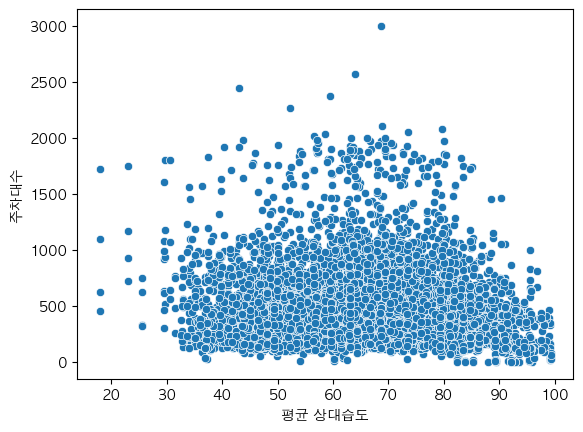

In [365]:
sns.scatterplot(
    x='평균 상대습도(%)',
    y='주차대수',
    # hue='휴일여부',
    data=df_weather
)
plt.ylabel('주차대수')
plt.xlabel('평균 상대습도')

plt.show()

> 습도는 필요 없음

In [1]:
plt.figure(figsize=(20,20))
sns.swarmplot(
    x='월',
    y='주차대수',
    data=df_weather,
)

plt.ylabel('주차대수')
plt.xlabel('월')

plt.show()

NameError: name 'plt' is not defined

--------------
## 온도 그래프

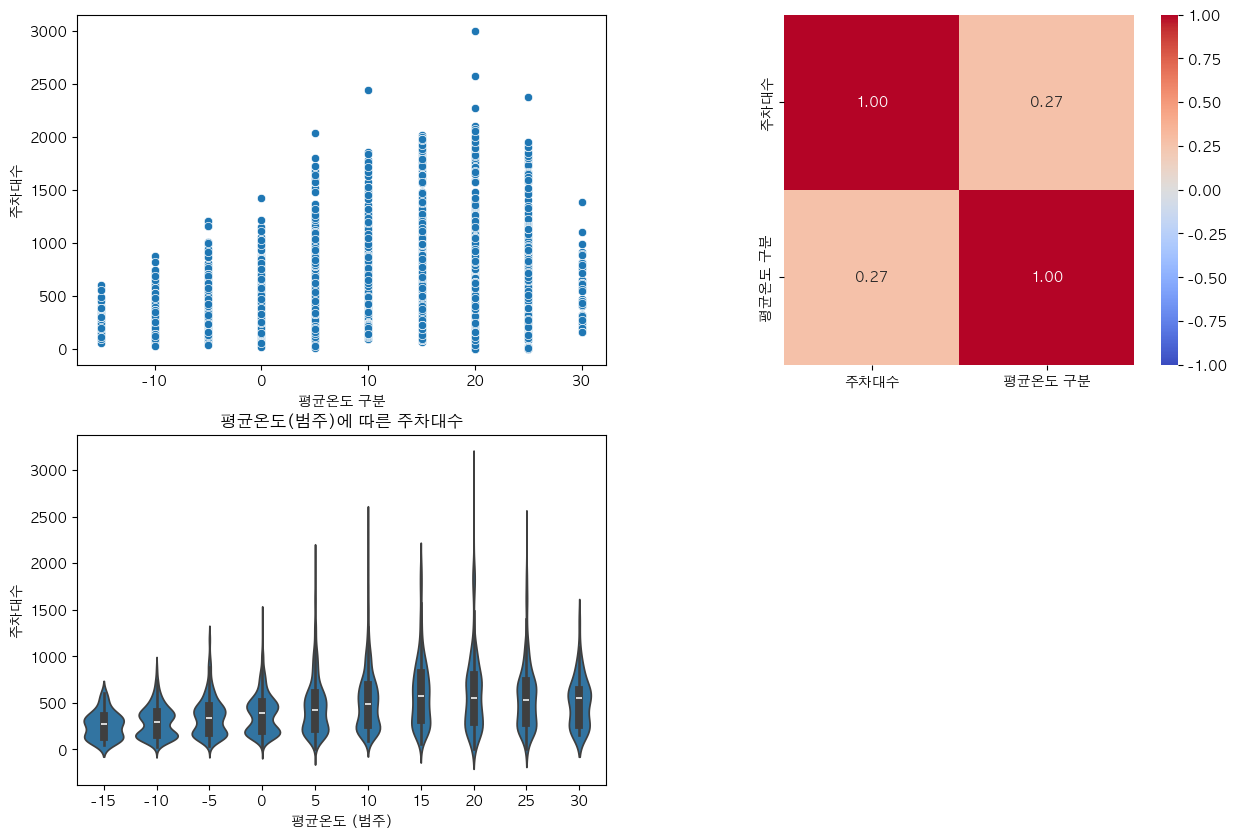

In [360]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.scatterplot(
    x='평균온도 구분',
    y='주차대수',
    data=df_weather,
    ax = ax1
)


sns.heatmap(df_weather[['주차대수','평균온도 구분']].corr(), 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ax=ax2
            ) 

sns.violinplot(
    y='주차대수',
    x='평균온도 구분',
    # hue='휴일여부',
    data= df_weather,
    ax=ax3
)
plt.xlabel('평균온도 (범주)')
plt.ylabel('주차대수')
plt.title('평균온도(범주)에 따른 주차대수')
plt.show()

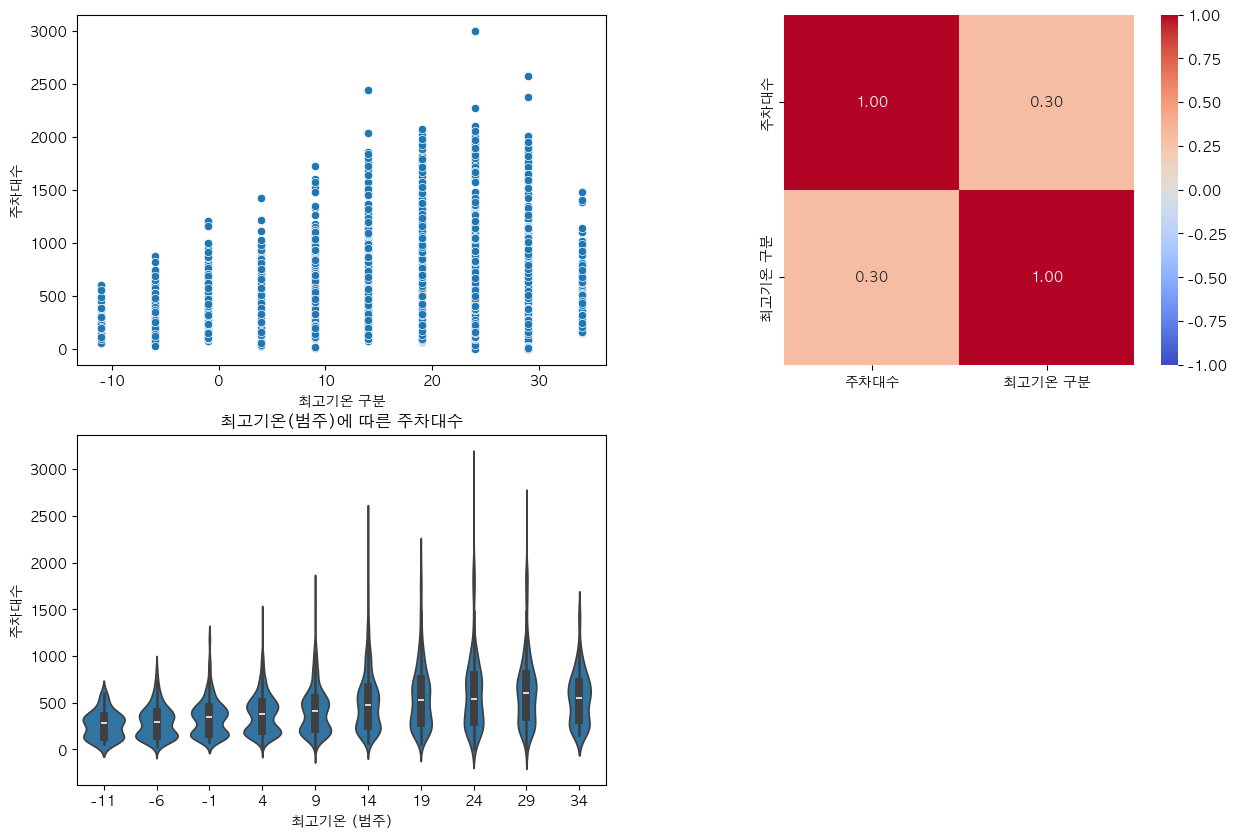

In [358]:

fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.scatterplot(
    x='최고기온 구분',
    y='주차대수',
    data=df_weather,
    ax = ax1
)
sns.heatmap(df_weather[['주차대수','최고기온 구분']].corr(), 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ax=ax2
            ) 

sns.violinplot(
    x='최고기온 구분',
    y='주차대수',
    data=df_weather,
    ax = ax3
)


plt.xlabel('최고기온 (범주)')
plt.ylabel('주차대수')
plt.title('최고기온(범주)에 따른 주차대수')
plt.show()

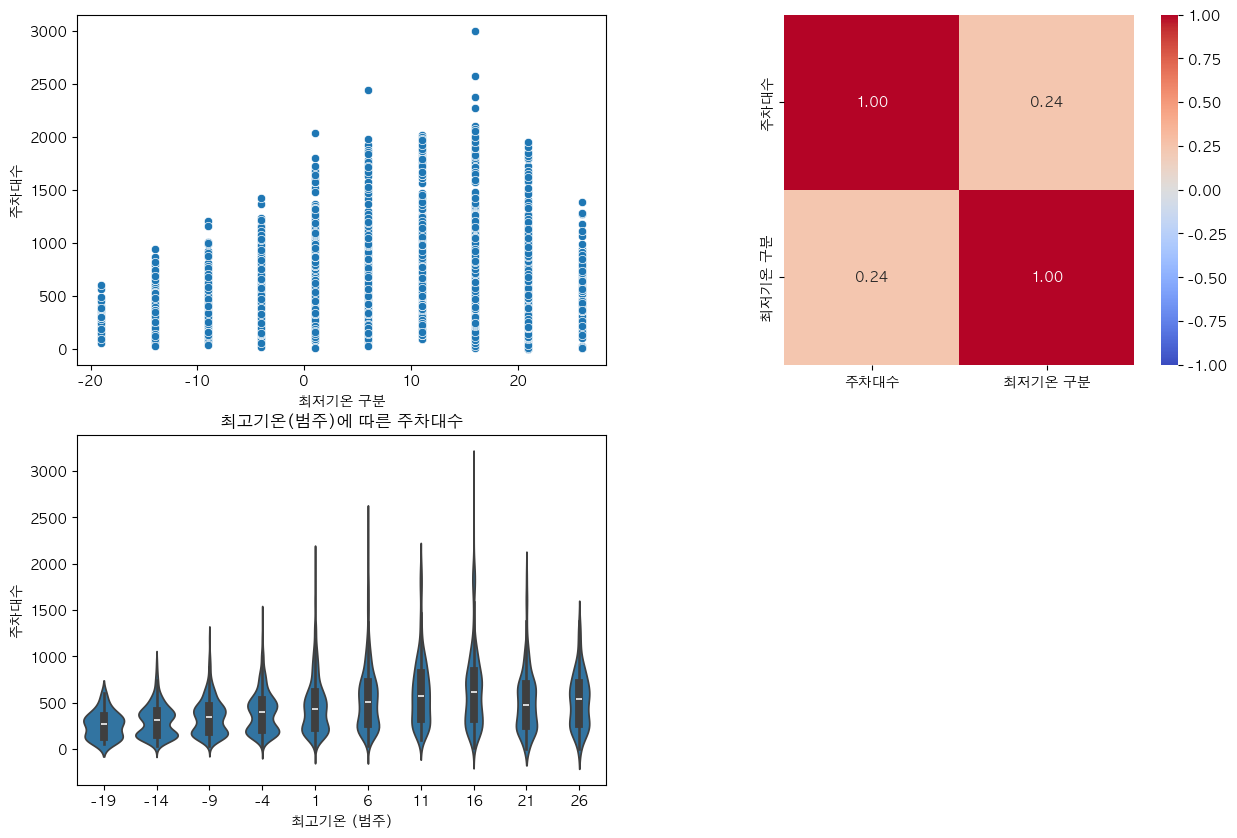

In [ ]:

fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.scatterplot(
    x='최저기온 구분',
    y='주차대수',
    data=df_weather,
    ax = ax1
)
sns.heatmap(df_weather[['주차대수','최저기온 구분']].corr(), 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ax=ax2
            ) 

sns.violinplot(
    x='최저기온 구분',
    y='주차대수',
    data=df_weather,
    ax = ax3
)


plt.xlabel('최저기온 (범주)')
plt.ylabel('주차대수')
plt.title('최저기온(범주)에 따른 주차대수')
plt.show()

> 평균기온, 최고기온, 최저기온은 쓸만하다

<Axes: >

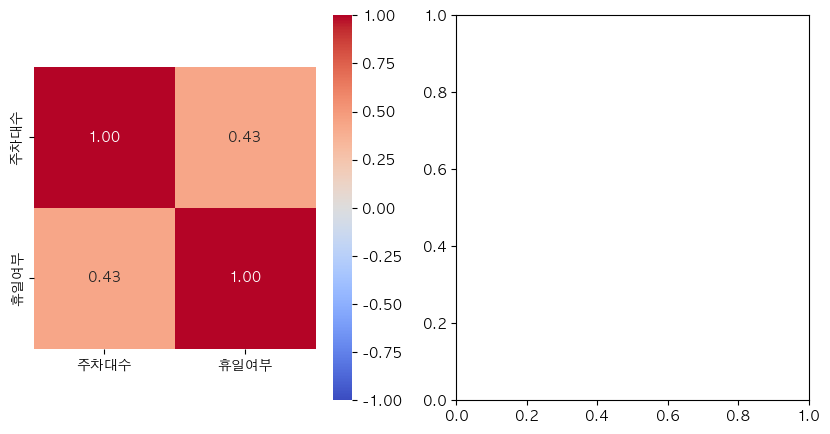

In [405]:

fig = plt.figure(figsize=(10,5))
ax1= fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.heatmap(df_weather[['주차대수','휴일여부']].corr(), 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ax=ax1
            )

# sns.swarmplot(
#     x='휴일여부',
#     y='주차대수',
#     data=df_weather,
#     ax=ax2
# )




> 휴일여부는 사용해야함

--------
### 교통량 데이터로 일별 주차대수를 아침, 점심, 저녁으로 나누기

In [473]:
df_traffic=pd.read_csv('../../Data/combined_data_filtered.csv')
df_traffic.head()

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,영동대교,20220301,유입,1109.0,784.0,579.0,395.0,361.0,516.0,773.0,...,2582.0,2614.0,2864.0,2677.0,2368.0,2260.0,2080.0,1893.0,1724.0,994.0
1,영동대교,20220302,유입,705.0,529.0,329.0,289.0,317.0,681.0,1239.0,...,3271.0,3340.0,4125.0,4203.0,3918.0,3783.0,2879.0,2820.0,2709.0,1470.0
2,영동대교,20220303,유입,1075.0,759.0,609.0,418.0,424.0,705.0,1212.0,...,3287.0,3458.0,4123.0,4323.0,3985.0,3701.0,2794.0,3068.0,2858.0,1540.0
3,영동대교,20220304,유입,1116.0,804.0,633.0,477.0,463.0,744.0,1336.0,...,3325.0,3683.0,4032.0,3954.0,3824.0,3473.0,3101.0,2983.0,3006.0,1572.0
4,영동대교,20220305,유입,1180.0,808.0,679.0,518.0,463.0,655.0,1014.0,...,3402.0,3597.0,4268.0,3818.0,3259.0,2644.0,2405.0,2225.0,2186.0,1351.0


<Axes: >

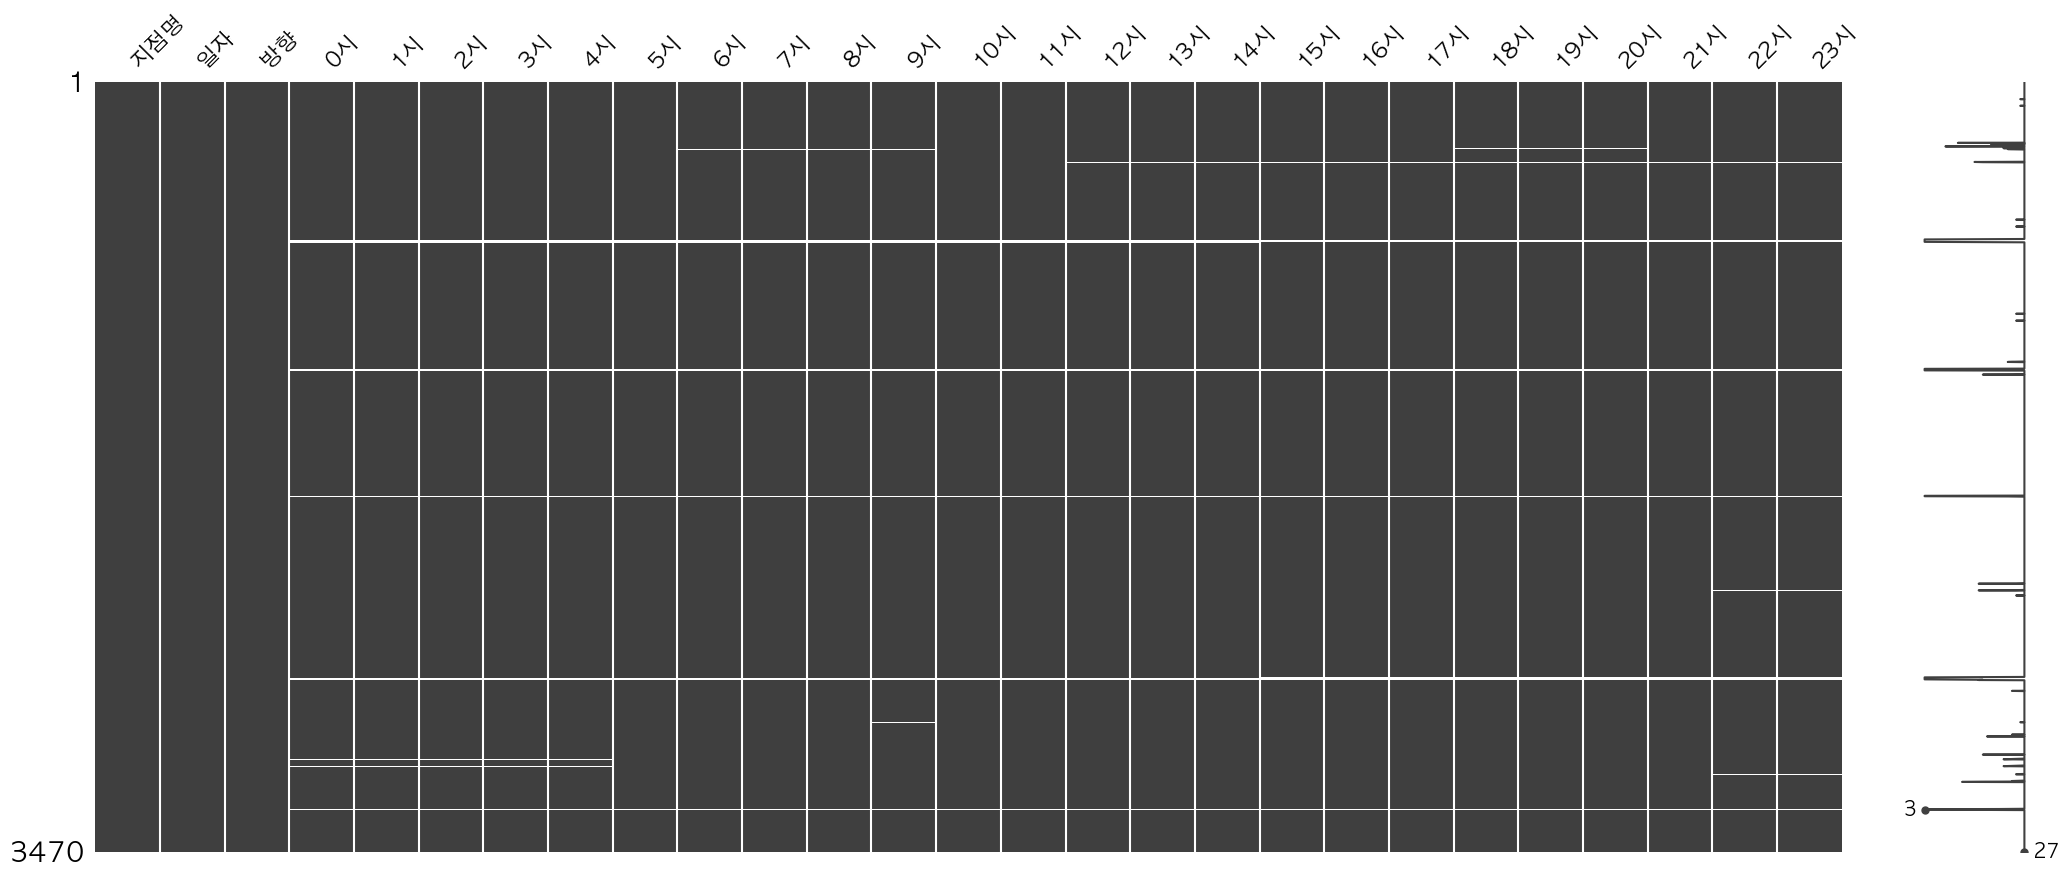

In [474]:
msno.matrix(df_traffic)

> 특정일에서 시간별 교통량 결측치 확인됨

In [475]:
df_traffic['일자']
#  타입 변경
df_traffic['일자']=df_traffic['일자'].astype(str)

In [476]:
df_traffic['일자']

0       20220301
1       20220302
2       20220303
3       20220304
4       20220305
          ...   
3465    20220626
3466    20220627
3467    20220628
3468    20220629
3469    20220630
Name: 일자, Length: 3470, dtype: object

In [479]:
# 년도, 월 구분을 위한 타입 변경
# df_traffic['일자']
df_traffic['일자']=pd.to_datetime(df_traffic['일자'], format='%Y%m%d')


In [480]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     3470 non-null   object        
 1   일자      3470 non-null   datetime64[ns]
 2   방향      3470 non-null   object        
 3   0시      3419 non-null   float64       
 4   1시      3419 non-null   float64       
 5   2시      3420 non-null   float64       
 6   3시      3421 non-null   float64       
 7   4시      3421 non-null   float64       
 8   5시      3423 non-null   float64       
 9   6시      3420 non-null   float64       
 10  7시      3419 non-null   float64       
 11  8시      3418 non-null   float64       
 12  9시      3415 non-null   float64       
 13  10시     3418 non-null   float64       
 14  11시     3422 non-null   float64       
 15  12시     3420 non-null   float64       
 16  13시     3421 non-null   float64       
 17  14시     3417 non-null   float64       
 18  15시     

In [ ]:
# 월, 년도 컬럼 추가

df_traffic['년도'] = df_traffic['일자'].dt.year
df_traffic['월'] = df_traffic['일자'].dt.month

In [ ]:
# 평일, 휴일 , 주말 나누기
# 대한민국 공휴일 가져오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 날짜가 공휴일인지를 체크하는 함수 추가
df_traffic['휴일여부'] = df_traffic['일자'].apply(lambda x: '휴일' if x in kr_holidays else ('주말' if x.weekday() >= 5 else '평일'))
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 214 to 3453
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     3010 non-null   object        
 1   날짜      3010 non-null   datetime64[ns]
 2   휴일여부    3010 non-null   object        
 3   아침 비율   3010 non-null   float64       
 4   낮 비율    3010 non-null   float64       
 5   저녁 비율   3010 non-null   float64       
 6   월       3010 non-null   int32         
 7   년도      3010 non-null   int32         
 8   일       3010 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 199.9+ KB


In [493]:
# 작업을 위해 분리
traffic_y = df_traffic[df_traffic['지점명'] == '영동대교']
traffic_c = df_traffic[df_traffic['지점명'] == '청담대교']

In [ ]:
traffic_c.head()


Index(['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시'],
      dtype='object')

In [504]:
t_col=traffic_c.columns[3:27]

In [514]:
traffic_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 31 to 3469
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     1735 non-null   object        
 1   일자      1735 non-null   datetime64[ns]
 2   방향      1735 non-null   object        
 3   0시      1707 non-null   float64       
 4   1시      1707 non-null   float64       
 5   2시      1707 non-null   float64       
 6   3시      1708 non-null   float64       
 7   4시      1708 non-null   float64       
 8   5시      1709 non-null   float64       
 9   6시      1706 non-null   float64       
 10  7시      1705 non-null   float64       
 11  8시      1704 non-null   float64       
 12  9시      1702 non-null   float64       
 13  10시     1705 non-null   float64       
 14  11시     1707 non-null   float64       
 15  12시     1705 non-null   float64       
 16  13시     1707 non-null   float64       
 17  14시     1706 non-null   float64       
 18  15시     1710

In [537]:
# nan 값 대치를 위해 평균대치법 사용(월, 휴일여부, 시간에 따른 평균값으로 대치)
t_col

Index(['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시'],
      dtype='object')

In [ ]:

for col in t_col:
    # 각 시간대별로 평균 계산
    mean = traffic_c.groupby(['휴일여부', '월'])[col].mean()
    value_dict = mean.to_dict()

    # NaN 값을 대체하는 함수 정의
    def replace_nan(row):
        if pd.isna(row[col]):
            key = (row['휴일여부'], row['월'])
            return value_dict.get(key, row[col])
        return row[col]

    # 해당 열의 NaN 값을 대체
    traffic_c[col] = traffic_c.apply(replace_nan, axis=1)

# 결과 확인
# print(traffic_c[['휴일여부', '월'] + t_col])

In [551]:
traffic_c.describe()

,일자,0시,1시,2시,3시,4시,5시,6시,7시,8시,...,16시,17시,18시,19시,20시,21시,22시,23시,년도,월
count,1735,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,...,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,2022-05-17 00:00:00,1033.048769,746.509184,548.049430,500.164281,627.418436,1290.168695,2474.081124,2865.123514,2974.591818,...,3549.699451,3418.753829,3129.368028,3125.318512,3185.578847,3043.623031,2566.344793,1624.752768,2021.893948,6.283573
min,2020-01-01 00:00:00,403.000000,291.000000,171.000000,119.000000,151.000000,218.000000,413.000000,619.000000,1051.000000,...,1652.000000,2034.000000,1637.000000,1334.000000,1321.000000,1258.000000,811.000000,631.000000,2020.000000,1.000000
25%,2021-03-09 12:00:00,895.000000,644.500000,473.500000,437.000000,572.500000,1110.000000,2048.000000,2392.000000,2858.000000,...,3404.500000,3245.000000,2962.000000,2951.000000,2941.000000,2817.000000,2277.500000,1400.000000,2021.000000,3.000000
50%,2022-05-17 00:00:00,1020.000000,738.000000,545.000000,507.000000,656.000000,1389.000000,2838.000000,3248.000000,3141.000000,...,3584.000000,3418.000000,3125.000000,3172.000000,3198.000000,3067.000000,2557.000000,1600.000000,2022.000000,6.000000
75%,2023-07-24 12:00:00,1155.000000,828.000000,616.000000,567.000000,722.500000,1562.500000,3035.000000,3406.000000,3270.500000,...,3716.000000,3596.000000,3302.500000,3358.000000,3471.500000,3293.000000,2867.000000,1799.000000,2023.000000,9.000000
max,2024-09-30 00:00:00,1639.000000,1554.000000,910.000000,817.000000,1070.000000,2262.000000,3738.000000,4046.000000,4093.000000,...,4652.000000,4454.000000,4180.000000,4147.000000,4224.000000,4097.000000,4375.000000,4033.000000,2024.000000,12.000000
std,NaN,201.493553,147.554043,112.082965,106.271121,140.393620,386.187007,783.333567,789.497273,501.844447,...,272.226925,294.034139,275.902196,355.872622,400.129904,366.692125,460.323435,330.403026,1.373351,3.373217


In [557]:
y_col=traffic_y.columns[3:27]

In [558]:

for col in y_col:
    # 각 시간대별로 평균 계산
    mean = traffic_y.groupby(['휴일여부', '월'])[col].mean()
    value_dict = mean.to_dict()

    # NaN 값을 대체하는 함수 정의
    def replace_nan(row):
        if pd.isna(row[col]):
            key = (row['휴일여부'], row['월'])
            return value_dict.get(key, row[col])
        return row[col]

    # 해당 열의 NaN 값을 대체
    traffic_y[col] = traffic_y.apply(replace_nan, axis=1)

# 결과 확인
# print(traffic_c[['휴일여부', '월'] + t_col])

In [559]:
traffic_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 0 to 3439
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     1735 non-null   object        
 1   일자      1735 non-null   datetime64[ns]
 2   방향      1735 non-null   object        
 3   0시      1735 non-null   float64       
 4   1시      1735 non-null   float64       
 5   2시      1735 non-null   float64       
 6   3시      1735 non-null   float64       
 7   4시      1735 non-null   float64       
 8   5시      1735 non-null   float64       
 9   6시      1735 non-null   float64       
 10  7시      1735 non-null   float64       
 11  8시      1735 non-null   float64       
 12  9시      1735 non-null   float64       
 13  10시     1735 non-null   float64       
 14  11시     1735 non-null   float64       
 15  12시     1735 non-null   float64       
 16  13시     1735 non-null   float64       
 17  14시     1735 non-null   float64       
 18  15시     1735 

In [564]:

print(len(pd.concat([traffic_y, traffic_c])) == len(df_traffic))
df_traffic = pd.concat([traffic_c, traffic_y])

True


In [584]:
traffic_c.reset_index(drop=True,inplace=True)

In [565]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3470 entries, 31 to 3439
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     3470 non-null   object        
 1   일자      3470 non-null   datetime64[ns]
 2   방향      3470 non-null   object        
 3   0시      3470 non-null   float64       
 4   1시      3470 non-null   float64       
 5   2시      3470 non-null   float64       
 6   3시      3470 non-null   float64       
 7   4시      3470 non-null   float64       
 8   5시      3470 non-null   float64       
 9   6시      3470 non-null   float64       
 10  7시      3470 non-null   float64       
 11  8시      3470 non-null   float64       
 12  9시      3470 non-null   float64       
 13  10시     3470 non-null   float64       
 14  11시     3470 non-null   float64       
 15  12시     3470 non-null   float64       
 16  13시     3470 non-null   float64       
 17  14시     3470 non-null   float64       
 18  15시     3470

In [576]:
df_traffic.sort_values(['지점명','일자'], ascending=False, inplace= True)

In [577]:
df_traffic.reset_index(drop=True, inplace= True)

In [578]:
df_traffic.to_csv('../../Data/뚝섬교통데이터.csv', index=False)

> 월, 휴일여부 로 그룹화 하여 각 시간별 평균을 구함 ---> nan값 대치


In [581]:
# df_traffic
df_weather

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi),평균 상대습도(%),평균온도 구분,최고기온 구분,최저기온 구분
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,0.3,2400.0,9.6,1539,63.6,0,9,-4
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,0,57.702857,4.8,0.3,2400.0,9.6,1539,63.6,0,9,-4
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,0,77.796154,4.8,0.3,2400.0,9.6,1539,63.6,0,9,-4
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,0,104.165399,4.8,0.3,2400.0,9.6,1539,63.6,0,9,-4
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,0,89.558974,6.4,3.2,712.0,10.1,1509,59.5,5,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,2020,1,21,0,243.992126,-0.4,-5.6,800.0,5.5,1541,36.9,-5,4,-9
5936,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,2020,1,20,0,25.310345,0.7,-3.3,2324.0,5.5,1313,46.8,0,4,-4
5937,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,2020,1,19,1,58.797521,1.9,-0.4,3.0,5.3,1510,62.8,0,4,-4
5938,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,2020,1,18,1,71.901186,0.3,-4.1,802.0,5.9,1503,48.1,0,4,-9


In [586]:
df_traffic

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
0,청담대교,2024-09-30,유입,875.0,630.0,493.0,480.0,762.0,2012.0,3183.0,...,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,9,평일
1,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,3299.0,3085.0,3112.0,3164.0,3019.0,2152.0,1352.0,2024,9,주말
2,청담대교,2024-09-28,유입,1381.0,1059.0,763.0,687.0,852.0,1654.0,2386.0,...,2996.0,2573.0,3002.0,3049.0,3022.0,2523.0,1600.0,2024,9,주말
3,청담대교,2024-09-27,유입,1265.0,895.0,666.0,611.0,883.0,1912.0,3096.0,...,2927.0,2499.0,2981.0,3537.0,3495.0,3147.0,2060.0,2024,9,평일
4,청담대교,2024-09-26,유입,1155.0,819.0,613.0,533.0,823.0,1885.0,3106.0,...,3309.0,2780.0,3576.0,3406.0,3243.0,3417.0,2175.0,2024,9,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,영동대교,2020-01-05,유입,1277.0,946.0,826.0,633.0,532.0,545.0,687.0,...,2958.0,2895.0,2292.0,2178.0,2016.0,1876.0,1108.0,2020,1,주말
3466,영동대교,2020-01-04,유입,1727.0,1305.0,1059.0,886.0,769.0,789.0,1027.0,...,3793.0,3803.0,3063.0,2678.0,2521.0,2529.0,1605.0,2020,1,주말
3467,영동대교,2020-01-03,유입,1511.0,1158.0,880.0,714.0,607.0,785.0,1215.0,...,3964.0,3790.0,4065.0,4235.0,3266.0,3315.0,2182.0,2020,1,평일
3468,영동대교,2020-01-02,유입,817.0,623.0,426.0,330.0,386.0,593.0,1160.0,...,4110.0,4333.0,4138.0,3379.0,3036.0,3064.0,1876.0,2020,1,평일


In [587]:
df_traffic

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
0,청담대교,2024-09-30,유입,875.0,630.0,493.0,480.0,762.0,2012.0,3183.0,...,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,9,평일
1,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,3299.0,3085.0,3112.0,3164.0,3019.0,2152.0,1352.0,2024,9,주말
2,청담대교,2024-09-28,유입,1381.0,1059.0,763.0,687.0,852.0,1654.0,2386.0,...,2996.0,2573.0,3002.0,3049.0,3022.0,2523.0,1600.0,2024,9,주말
3,청담대교,2024-09-27,유입,1265.0,895.0,666.0,611.0,883.0,1912.0,3096.0,...,2927.0,2499.0,2981.0,3537.0,3495.0,3147.0,2060.0,2024,9,평일
4,청담대교,2024-09-26,유입,1155.0,819.0,613.0,533.0,823.0,1885.0,3106.0,...,3309.0,2780.0,3576.0,3406.0,3243.0,3417.0,2175.0,2024,9,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,영동대교,2020-01-05,유입,1277.0,946.0,826.0,633.0,532.0,545.0,687.0,...,2958.0,2895.0,2292.0,2178.0,2016.0,1876.0,1108.0,2020,1,주말
3466,영동대교,2020-01-04,유입,1727.0,1305.0,1059.0,886.0,769.0,789.0,1027.0,...,3793.0,3803.0,3063.0,2678.0,2521.0,2529.0,1605.0,2020,1,주말
3467,영동대교,2020-01-03,유입,1511.0,1158.0,880.0,714.0,607.0,785.0,1215.0,...,3964.0,3790.0,4065.0,4235.0,3266.0,3315.0,2182.0,2020,1,평일
3468,영동대교,2020-01-02,유입,817.0,623.0,426.0,330.0,386.0,593.0,1160.0,...,4110.0,4333.0,4138.0,3379.0,3036.0,3064.0,1876.0,2020,1,평일


In [595]:
df_traffic['아침']=df_traffic.loc[:,['6시','7시','8시','9시','10시']].sum(axis='columns')
df_traffic['낮']=df_traffic.loc[:,['11시','12시','13시','14시','15시','16시','17시']].sum(axis='columns')
df_traffic['저녁']=df_traffic.loc[:,['0시','18시','19시','20시','21시','22시','23시']].sum(axis='columns')

In [599]:
# df_traffic[['지점명','일자','아침','낮','저녁']]
df_traffic['아침 비율']=df_traffic['아침'] / df_traffic[['아침','낮','저녁']].sum(axis='columns')
df_traffic['낮 비율']=df_traffic['낮'] / df_traffic[['아침','낮','저녁']].sum(axis='columns')
df_traffic['저녁 비율']=df_traffic['저녁'] / df_traffic[['아침','낮','저녁']].sum(axis='columns')

> 시간 합치기 : 아침 6~10 / 낮 11~17 / 저녁 18~0                
> 아침, 낮, 저녁별로 교통량 비율 컬럼 추가

In [626]:
df_traffic

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,년도,월,휴일여부,아침,낮,저녁,아침 비율,낮 비율,저녁 비율,일
0,청담대교,2024-09-30,유입,875.0,630.0,493.0,480.0,762.0,2012.0,3183.0,...,2024,9,NaN,16117.0,23644.0,17826.0,0.279872,0.410579,0.309549,30
1,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,2024,9,NaN,12715.0,22668.0,16921.0,0.243098,0.433389,0.323513,29
2,청담대교,2024-09-28,유입,1381.0,1059.0,763.0,687.0,852.0,1654.0,2386.0,...,2024,9,NaN,15777.0,23672.0,17150.0,0.278751,0.418241,0.303009,28
3,청담대교,2024-09-27,유입,1265.0,895.0,666.0,611.0,883.0,1912.0,3096.0,...,2024,9,NaN,16329.0,23325.0,18984.0,0.278471,0.397780,0.323749,27
4,청담대교,2024-09-26,유입,1155.0,819.0,613.0,533.0,823.0,1885.0,3106.0,...,2024,9,NaN,16385.0,22180.0,19752.0,0.280964,0.380335,0.338701,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,영동대교,2020-01-05,유입,1277.0,946.0,826.0,633.0,532.0,545.0,687.0,...,2020,1,NaN,6921.0,19578.0,13642.0,0.172417,0.487731,0.339852,5
3466,영동대교,2020-01-04,유입,1727.0,1305.0,1059.0,886.0,769.0,789.0,1027.0,...,2020,1,NaN,10011.0,24595.0,17926.0,0.190570,0.468191,0.341240,4
3467,영동대교,2020-01-03,유입,1511.0,1158.0,880.0,714.0,607.0,785.0,1215.0,...,2020,1,NaN,11577.0,24304.0,22364.0,0.198764,0.417272,0.383964,3
3468,영동대교,2020-01-02,유입,817.0,623.0,426.0,330.0,386.0,593.0,1160.0,...,2020,1,NaN,11201.0,23585.0,20643.0,0.202078,0.425499,0.372422,2


In [625]:
df_weather['휴일여부'].unique()

array([0, 1])

In [615]:
df_weather.drop(['최저기온 시각(hhmi)','최고기온 시각(hhmi)','평균 상대습도(%)'],axis=1, inplace=True)

### 일별 주차장 데이터와 합치기 위해 날짜 맞춰주기

In [668]:
df_weather['날짜'].sort_values(ascending=False)

0      2024-02-29
3      2024-02-29
1      2024-02-29
2      2024-02-29
6      2024-02-28
          ...    
5935   2020-01-21
5936   2020-01-20
5937   2020-01-19
5938   2020-01-18
5939   2020-01-17
Name: 날짜, Length: 5940, dtype: datetime64[ns]

In [675]:
df_traffic.rename(columns={'일자':'날짜'},inplace=True)

In [676]:
df_traffic['날짜'].sort_values(ascending=False)

0      2024-09-30
1735   2024-09-30
1736   2024-09-29
1      2024-09-29
1737   2024-09-28
          ...    
3467   2020-01-03
1733   2020-01-02
3468   2020-01-02
1734   2020-01-01
3469   2020-01-01
Name: 날짜, Length: 3470, dtype: datetime64[ns]

In [677]:
start_date = '2020-01-17'
end_date = '2024-02-29'

# 날짜 범위로 필터링
df_traffic = df_traffic[(df_traffic['날짜'] >= start_date) & (df_traffic['날짜'] <= end_date)]

df_traffic['날짜'].sort_values(ascending=False)

214    2024-02-29
1949   2024-02-29
1950   2024-02-28
215    2024-02-28
1951   2024-02-27
          ...    
3451   2020-01-19
3452   2020-01-18
1717   2020-01-18
1718   2020-01-17
3453   2020-01-17
Name: 날짜, Length: 3010, dtype: datetime64[ns]

> 교통량 데이터를 기준으로 날짜 맞춰줌

In [684]:
# 병합을 위해 traffic의 평일, 주말, 휴일을 숫자로 변경
df_traffic['휴일여부']=df_traffic['휴일여부'].map({'평일':0,'주말':1,'휴일':1})

In [685]:
df_traffic['휴일여부'].unique()

array([0, 1])

In [ ]:
df_traffic['일'] = df_traffic['날짜'].dt.day

In [688]:
df_traffic=df_traffic[['지점명','날짜','휴일여부','아침 비율','낮 비율', '저녁 비율','월','년도','일']]

In [689]:
traffic_c=df_traffic[df_traffic['지점명']=='청담대교']
traffic_y=df_traffic[df_traffic['지점명']=='영동대교']

In [690]:
traffic_y.head()

,지점명,날짜,휴일여부,아침 비율,낮 비율,저녁 비율,월,년도,일
1949,영동대교,2024-02-29,0,0.188226,0.429115,0.382659,2,2024,29
1950,영동대교,2024-02-28,0,0.200213,0.431652,0.368134,2,2024,28
1951,영동대교,2024-02-27,0,0.198310,0.434136,0.367554,2,2024,27
1952,영동대교,2024-02-26,0,0.200553,0.447434,0.352013,2,2024,26
1953,영동대교,2024-02-25,1,0.181405,0.487784,0.330811,2,2024,25


In [691]:
traffic_c.head()

,지점명,날짜,휴일여부,아침 비율,낮 비율,저녁 비율,월,년도,일
214,청담대교,2024-02-29,0,0.264305,0.395477,0.340218,2,2024,29
215,청담대교,2024-02-28,0,0.275049,0.417107,0.307844,2,2024,28
216,청담대교,2024-02-27,0,0.274294,0.421402,0.304304,2,2024,27
217,청담대교,2024-02-26,0,0.292647,0.423629,0.283725,2,2024,26
218,청담대교,2024-02-25,1,0.215397,0.477302,0.307301,2,2024,25


In [ ]:
len(traffic_c.index) == len(traffic_y.index)

True

In [665]:
traffic_c.rename(columns={'일자':'날짜'},inplace=True)

In [694]:
print(df_weather.columns)
print(traffic_c.columns)
print(traffic_y.columns)

Index(['지구별', '주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부',
       '1대당 평균 주차시간', '평균기온', '최저기온', '최고기온', '평균온도 구분', '최고기온 구분', '최저기온 구분'],
      dtype='object')
Index(['지점명', '날짜', '휴일여부', '아침 비율', '낮 비율', '저녁 비율', '월', '년도', '일'], dtype='object')
Index(['지점명', '날짜', '휴일여부', '아침 비율', '낮 비율', '저녁 비율', '월', '년도', '일'], dtype='object')


In [700]:
traffic_c.drop(['년도','월','일','휴일여부'],axis=1, inplace=True)
traffic_y.drop(['년도','월','일','휴일여부'],axis=1, inplace=True)

In [702]:
traffic_merge=pd.merge(traffic_c,traffic_y,on='날짜',suffixes=('_청담','_영동'))

In [707]:
final_merge=pd.merge(df_weather,traffic_merge,on='날짜')

In [708]:
final_merge

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,...,최고기온 구분,최저기온 구분,지점명_청담,아침 비율_청담,낮 비율_청담,저녁 비율_청담,지점명_영동,아침 비율_영동,낮 비율_영동,저녁 비율_영동
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,...,9,-4,청담대교,0.264305,0.395477,0.340218,영동대교,0.188226,0.429115,0.382659
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,0,57.702857,...,9,-4,청담대교,0.264305,0.395477,0.340218,영동대교,0.188226,0.429115,0.382659
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,0,77.796154,...,9,-4,청담대교,0.264305,0.395477,0.340218,영동대교,0.188226,0.429115,0.382659
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,0,104.165399,...,9,-4,청담대교,0.264305,0.395477,0.340218,영동대교,0.188226,0.429115,0.382659
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,0,89.558974,...,9,1,청담대교,0.275049,0.417107,0.307844,영동대교,0.200213,0.431652,0.368134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,2020,1,21,0,243.992126,...,4,-9,청담대교,0.267244,0.413718,0.319039,영동대교,0.185738,0.425626,0.388636
5936,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,2020,1,20,0,25.310345,...,4,-4,청담대교,0.271472,0.413979,0.314549,영동대교,0.190675,0.437027,0.372299
5937,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,2020,1,19,1,58.797521,...,4,-4,청담대교,0.209281,0.472601,0.318117,영동대교,0.173643,0.486582,0.339775
5938,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,2020,1,18,1,71.901186,...,4,-9,청담대교,0.250248,0.433022,0.316730,영동대교,0.187630,0.461903,0.350467


In [ ]:
# final_merge.to_csv('../../Data/최종.csv',index=False)

In [9]:
final_merge = pd.read_csv('../../Data/최종.csv')

In [10]:
# final_merge.columns
df_final=final_merge.drop(['년도','일','지점명_청담','지점명_영동'],axis=1)

In [18]:
df_final['날짜']=pd.to_datetime(df_final['날짜'])

<Axes: >

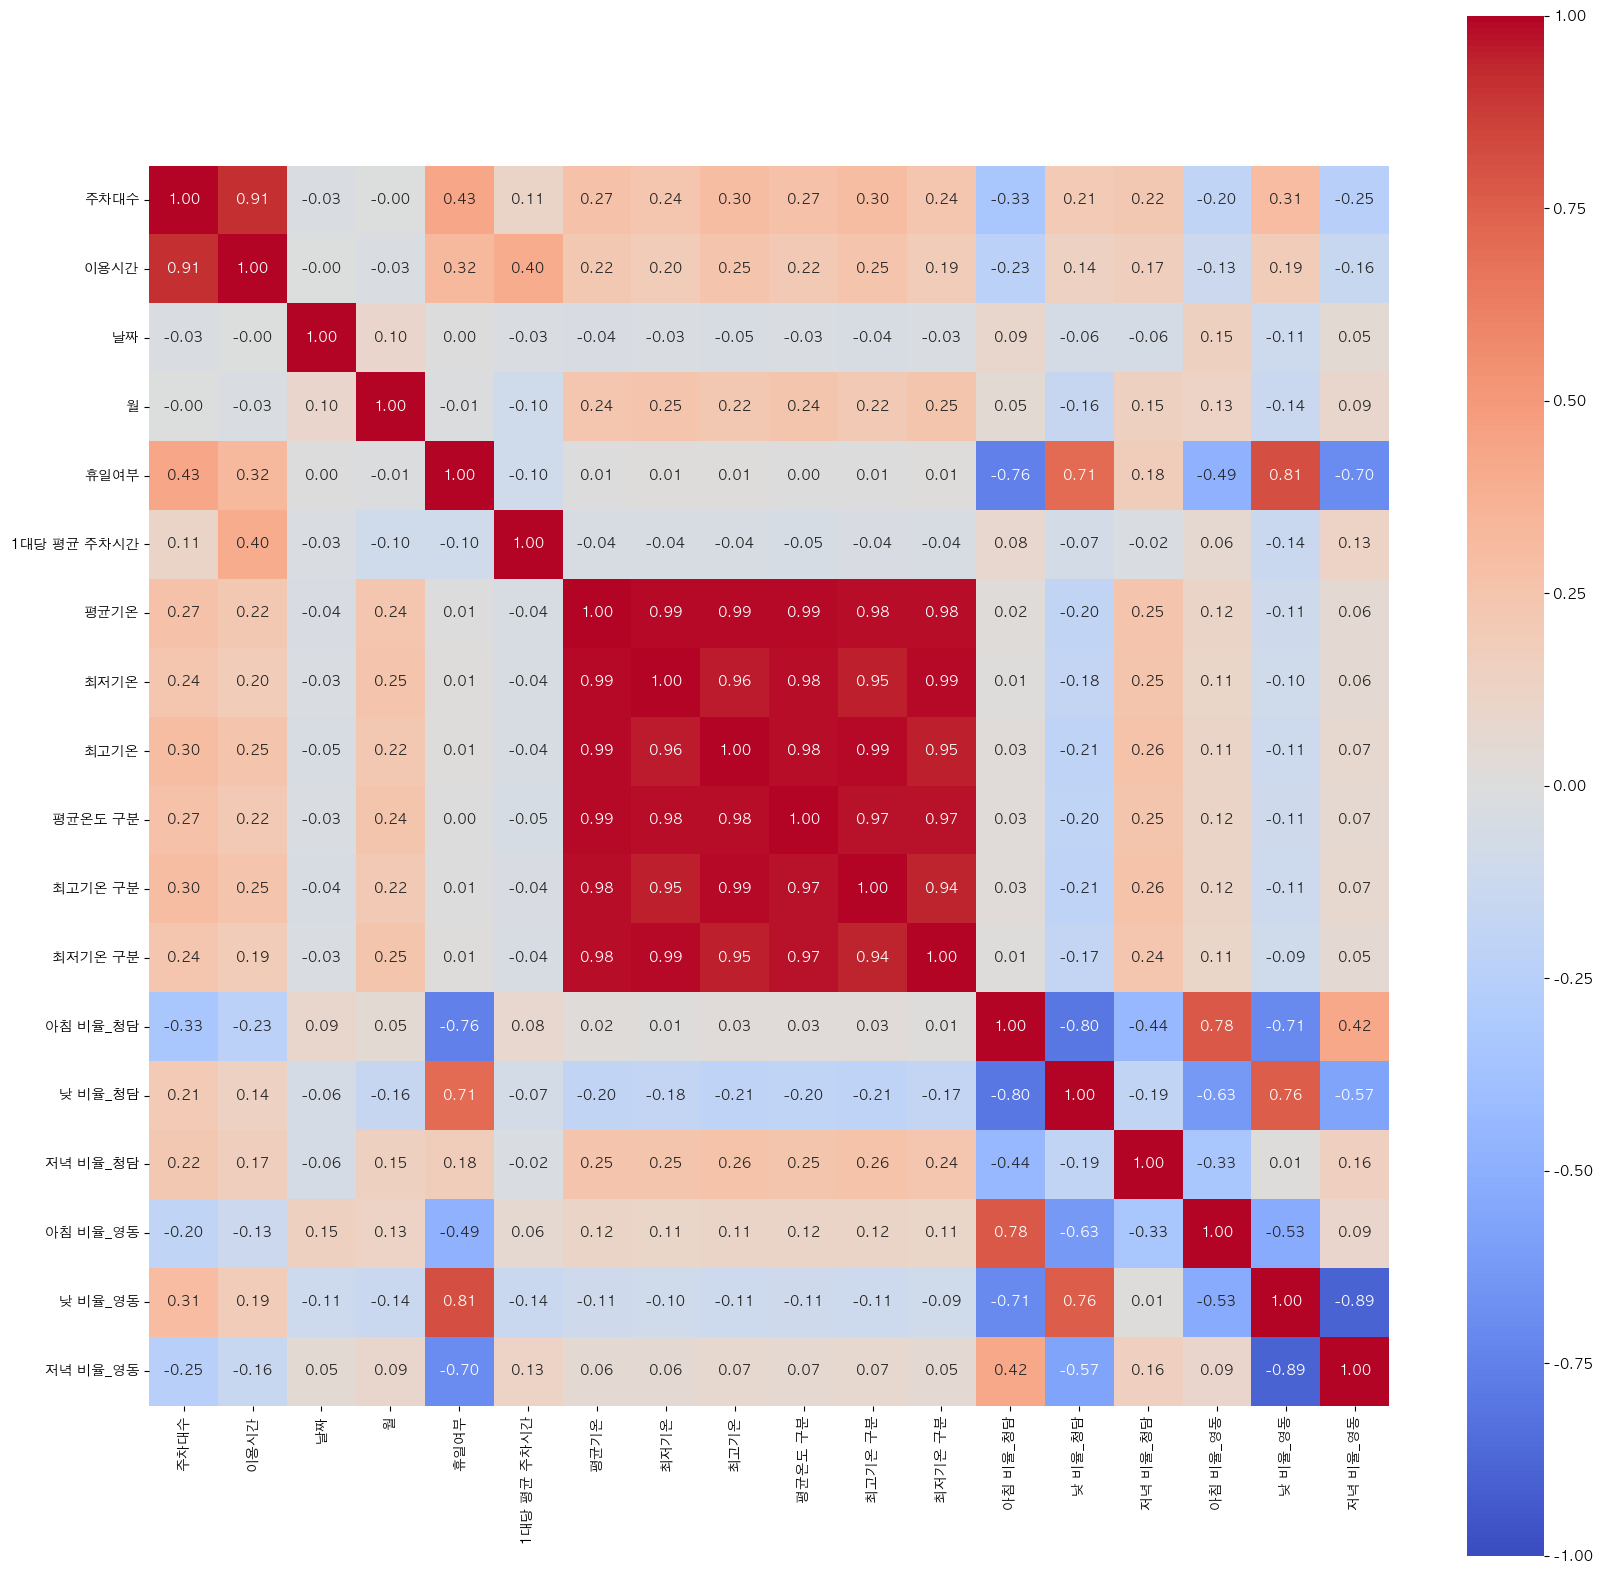

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final.iloc[:,2:].corr(),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            )

In [20]:
df_final

,지구별,주차장명,주차대수,이용시간,날짜,월,휴일여부,1대당 평균 주차시간,평균기온,최저기온,최고기온,평균온도 구분,최고기온 구분,최저기온 구분,아침 비율_청담,낮 비율_청담,저녁 비율_청담,아침 비율_영동,낮 비율_영동,저녁 비율_영동
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2,0,105.888031,4.8,0.3,9.6,0,9,-4,0.264305,0.395477,0.340218,0.188226,0.429115,0.382659
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2,0,57.702857,4.8,0.3,9.6,0,9,-4,0.264305,0.395477,0.340218,0.188226,0.429115,0.382659
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2,0,77.796154,4.8,0.3,9.6,0,9,-4,0.264305,0.395477,0.340218,0.188226,0.429115,0.382659
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2,0,104.165399,4.8,0.3,9.6,0,9,-4,0.264305,0.395477,0.340218,0.188226,0.429115,0.382659
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2,0,89.558974,6.4,3.2,10.1,5,9,1,0.275049,0.417107,0.307844,0.200213,0.431652,0.368134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,1,0,243.992126,-0.4,-5.6,5.5,-5,4,-9,0.267244,0.413718,0.319039,0.185738,0.425626,0.388636
5936,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,1,0,25.310345,0.7,-3.3,5.5,0,4,-4,0.271472,0.413979,0.314549,0.190675,0.437027,0.372299
5937,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,1,1,58.797521,1.9,-0.4,5.3,0,4,-4,0.209281,0.472601,0.318117,0.173643,0.486582,0.339775
5938,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,1,1,71.901186,0.3,-4.1,5.9,0,4,-9,0.250248,0.433022,0.316730,0.187630,0.461903,0.350467


In [ ]:
# 영동대교 기반 주차대수 분리
df_final['영동_아침주차'] = df_final['주차대수'] * df_final['아침 비율_영동']
df_final['영동_낮주차'] = df_final['주차대수'] * df_final['낮 비율_영동']
df_final['영동_저녁주차'] = df_final['주차대수'] * df_final['저녁 비율_영동']

In [ ]:
# 청담대교 기반 주차대수 분리
df_final['청담_아침주차'] = df_final['주차대수'] * df_final['아침 비율_청담']
df_final['청담_낮주차'] = df_final['주차대수'] * df_final['낮 비율_청담']
df_final['청담_저녁주차'] = df_final['주차대수'] * df_final['저녁 비율_청담']

In [ ]:
# 영동대교 기반 이용시간 분리
df_final['영동_아침이용'] = df_final['이용시간'] 

,지구별,주차장명,주차대수,이용시간,날짜,월,휴일여부,1대당 평균 주차시간,평균기온,최저기온,...,저녁 비율_청담,아침 비율_영동,낮 비율_영동,저녁 비율_영동,영동_아침주차,영동_낮주차,영동_저녁주차,청담_아침주차,청담_낮주차,청담_저녁주차
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2,0,105.888031,4.8,0.3,...,0.340218,0.188226,0.429115,0.382659,97.501291,222.281389,198.217320,136.909873,204.857166,176.232961
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2,0,57.702857,4.8,0.3,...,0.340218,0.188226,0.429115,0.382659,32.939625,75.095064,66.965311,46.253335,69.208502,59.538163
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2,0,77.796154,4.8,0.3,...,0.340218,0.188226,0.429115,0.382659,48.938872,111.569809,99.491319,68.719241,102.824060,88.456699
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2,0,104.165399,4.8,0.3,...,0.340218,0.188226,0.429115,0.382659,99.007103,225.714306,201.278591,139.024311,208.020984,178.954706
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2,0,89.558974,6.4,3.2,...,0.307844,0.200213,0.431652,0.368134,39.041615,84.172189,71.786196,53.634591,81.335899,60.029510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,1,0,243.992126,-0.4,-5.6,...,0.319039,0.185738,0.425626,0.388636,23.588702,54.054480,49.356818,33.939936,52.542162,40.517902
5936,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,1,0,25.310345,0.7,-3.3,...,0.314549,0.190675,0.437027,0.372299,11.059134,25.347544,21.593322,15.745381,24.010794,18.243825
5937,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,1,1,58.797521,1.9,-0.4,...,0.318117,0.173643,0.486582,0.339775,42.021679,117.752740,82.225582,50.646083,114.369489,76.984429
5938,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,1,1,71.901186,0.3,-4.1,...,0.316730,0.187630,0.461903,0.350467,47.470482,116.861358,88.668160,63.312745,109.554517,80.132738
